# **Part B**

In [15]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LayerNormalization
from keras.utils import to_categorical

In [17]:
#dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.3)

You have learnt about data augmentation in the theoretical assignment, Now you need to use it in the above dataset (You can do it using ImageDataGenerator

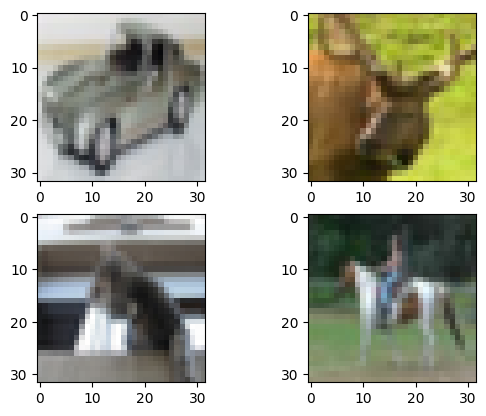

In [18]:
# Create an ImageDataGenerator object

# (1) Original Images :
datagen = ImageDataGenerator()
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train/255, Y_train/255, batch_size=4, seed=42):
  for i in range(0,4):
    plt.subplot(220 +1 +i)
    plt.imshow(X_batch[i])
  plt.show()
  break

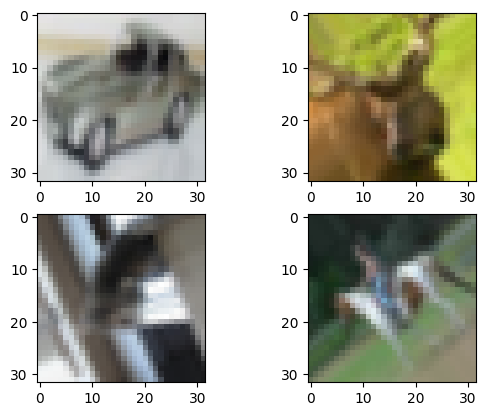

In [19]:
# (2) Rotating Images :

datagen = ImageDataGenerator(rotation_range=180)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train/255, Y_train/255, batch_size=4, seed=42):
  for i in range(0,4):
    plt.subplot(220 +1 +i)
    plt.imshow(X_batch[i])
  plt.show()
  break

# Similarly can apply various other data augmentation methods like Vertical Scroll, Zoom Range, Zca Whitening, etc.

In [20]:
# Source - https://www.kaggle.com/code/mielek/data-augmentation-with-keras-using-cifar-10

Use Visualization libraries to see how data augmentation works.

Train a CNN model of your choice and evaluate on the test data using weighted F1 scores ( Do not just try with a single model use multiple models, for example- one with transfer learning or with a different model architecture) at the end compare the performance of the models, and write what do you infer from the same

In [21]:
input_shape =  X_train.shape[1:]        # X_train.shape[0] just represents number of images.

In [22]:
Y_train = pd.DataFrame(Y_train)
output_shape = Y_train.nunique()
Y_train = np.array(Y_train)

In [23]:
input_shape

(32, 32, 3)

In [24]:
output_shape

0    10
dtype: int64

In [25]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

In [26]:
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(output_shape, activation='softmax'))

# BatchNorm is basically row wise normalization.

In [27]:
model_1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
model_1.fit(X_train, Y_train, epochs=10, validation_data = (X_val, Y_val))

Epoch 1/10
1094/1094 [==============================] - 38s 33ms/step - loss: 1.5771 - accuracy: 0.4645 - val_loss: 1.1405 - val_accuracy: 0.5991
Epoch 2/10
1094/1094 [==============================] - 36s 33ms/step - loss: 1.0962 - accuracy: 0.6139 - val_loss: 1.0911 - val_accuracy: 0.6149
Epoch 3/10
1094/1094 [==============================] - 36s 33ms/step - loss: 0.9627 - accuracy: 0.6631 - val_loss: 0.9628 - val_accuracy: 0.6671
Epoch 4/10
1094/1094 [==============================] - 36s 33ms/step - loss: 0.8615 - accuracy: 0.7009 - val_loss: 1.0210 - val_accuracy: 0.6449
Epoch 5/10
1094/1094 [==============================] - 36s 33ms/step - loss: 0.7707 - accuracy: 0.7317 - val_loss: 1.0161 - val_accuracy: 0.6623
Epoch 6/10
1094/1094 [==============================] - 36s 33ms/step - loss: 0.6986 - accuracy: 0.7545 - val_loss: 1.1226 - val_accuracy: 0.6335
Epoch 7/10
1094/1094 [==============================] - 36s 33ms/step - loss: 0.6451 - accuracy: 0.7747 - val_loss: 0.9251 -

In [29]:
# Predicting on the test dataset.

Y_pred_probs = model_1.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)
Y_true = np.argmax(Y_test, axis=1)

313/313 [==============================] - 3s 9ms/step


In [30]:
f1_weighted = f1_score(Y_true, Y_pred, average='weighted')

print(f"F1 Score (Weighted): {f1_weighted:.2f}")

F1 Score (Weighted): 0.70


In [31]:
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_2.add(LayerNormalization())
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(LayerNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(LayerNormalization())
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(LayerNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(output_shape, activation='softmax'))

# LayerNorm is basically column wise normalization.

d:\Python 3.11.6\Lib\site-packages\keras\src\layers\core\dense.py:119: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.units = int(units) if not isinstance(units, int) else units


In [32]:
model_2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [33]:
model_2.fit(X_train, Y_train, epochs=10, validation_data = (X_val, Y_val))

Epoch 1/10
1094/1094 [==============================] - 46s 40ms/step - loss: 1.6811 - accuracy: 0.3969 - val_loss: 1.1963 - val_accuracy: 0.5808
Epoch 2/10
1094/1094 [==============================] - 44s 40ms/step - loss: 1.1779 - accuracy: 0.5831 - val_loss: 1.0547 - val_accuracy: 0.6265
Epoch 3/10
1094/1094 [==============================] - 44s 40ms/step - loss: 1.0030 - accuracy: 0.6456 - val_loss: 0.9567 - val_accuracy: 0.6629
Epoch 4/10
1094/1094 [==============================] - 44s 40ms/step - loss: 0.8878 - accuracy: 0.6910 - val_loss: 0.9434 - val_accuracy: 0.6691
Epoch 5/10
1094/1094 [==============================] - 44s 40ms/step - loss: 0.7920 - accuracy: 0.7243 - val_loss: 0.9195 - val_accuracy: 0.6817
Epoch 6/10
1094/1094 [==============================] - 44s 40ms/step - loss: 0.7040 - accuracy: 0.7523 - val_loss: 0.9108 - val_accuracy: 0.6843
Epoch 7/10
1094/1094 [==============================] - 44s 40ms/step - loss: 0.6327 - accuracy: 0.7749 - val_loss: 0.9142 -

In [34]:
# Predicting on the test dataset.

Y_pred_probs = model_2.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)
Y_true = np.argmax(Y_test, axis=1)

313/313 [==============================] - 5s 16ms/step


In [35]:
f1_weighted = f1_score(Y_true, Y_pred, average='weighted')

print(f"F1 Score (Weighted): {f1_weighted:.2f}")

F1 Score (Weighted): 0.69


In [ ]:
# Conclusion - For our model, Batch norm and Layer norm give about the same results. 


In [36]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model_3.add(Conv2D(64, (5, 5), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(3, 3)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(output_shape, activation='softmax'))

d:\Python 3.11.6\Lib\site-packages\keras\src\layers\core\dense.py:119: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  self.units = int(units) if not isinstance(units, int) else units


In [37]:
model_3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
model_3.fit(X_train, Y_train, epochs=10, validation_data = (X_val, Y_val))

Epoch 1/10
1094/1094 [==============================] - 42s 37ms/step - loss: 2.4482 - accuracy: 0.1822 - val_loss: 2.0081 - val_accuracy: 0.2402
Epoch 2/10
1094/1094 [==============================] - 40s 37ms/step - loss: 1.9877 - accuracy: 0.2429 - val_loss: 1.8466 - val_accuracy: 0.3237
Epoch 3/10
1094/1094 [==============================] - 42s 38ms/step - loss: 1.8902 - accuracy: 0.2963 - val_loss: 1.7824 - val_accuracy: 0.3579
Epoch 4/10
1094/1094 [==============================] - 41s 38ms/step - loss: 1.7653 - accuracy: 0.3546 - val_loss: 1.5967 - val_accuracy: 0.4357
Epoch 5/10
1094/1094 [==============================] - 42s 38ms/step - loss: 1.6647 - accuracy: 0.3971 - val_loss: 1.5357 - val_accuracy: 0.4457
Epoch 6/10
1094/1094 [==============================] - 43s 40ms/step - loss: 1.5763 - accuracy: 0.4346 - val_loss: 1.4743 - val_accuracy: 0.4864
Epoch 7/10
1094/1094 [==============================] - 41s 38ms/step - loss: 1.5179 - accuracy: 0.4605 - val_loss: 1.4114 -

In [39]:
# Predicting on the test dataset.

Y_pred_probs = model_3.predict(X_test)
Y_pred = np.argmax(Y_pred_probs, axis=1)
Y_true = np.argmax(Y_test, axis=1)

313/313 [==============================] - 4s 12ms/step


In [40]:
f1_weighted = f1_score(Y_true, Y_pred, average='weighted')

print(f"F1 Score (Weighted): {f1_weighted:.2f}")

F1 Score (Weighted): 0.52


In [ ]:
# Changing the kernel's size affected our accuracy adversely here.

In [ ]:
# We can also try many others such as kernel sizes to some other values, using normalization, standardising the inputs, etc.